In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('Football_data_merged_cleaned.csv')
df.head()

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,appearance_id,game_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type,type,minute,type_y
0,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2320457_124732,2320457.0,2013-08-04,John Anthony Brooks,DFB,0.0,0.0,0.0,0.0,120.0,2013.0,First Round,2.0,3.0,0.0,0.0,Ervin Lamce,Jos Luhukay,Grummi Arena,5446.0,Benjamin Cortus,Borussia Dortmund,Hertha BSC,02:03:00,domestic_cup,Unknown,0.0,Unknown
1,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321034_124732,2321034.0,2013-08-10,John Anthony Brooks,L1,0.0,0.0,1.0,0.0,90.0,2013.0,1. Matchday,6.0,1.0,1.0,18.0,Jos Luhukay,Armin Veh,Olympiastadion Berlin,54376.0,Michael Weiner,Hertha BSC,eintracht frankfurt Football ag,06:01:00,domestic_league,Unknown,32.0,Goals
2,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321049_124732,2321049.0,2013-08-18,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,8.0,2013.0,2. Matchday,2.0,2.0,11.0,6.0,Michael Wiesinger,Jos Luhukay,Max-Morlock-Stadion,37068.0,Guido Winkmann,1.FC Nuremberg,Hertha BSC,02:02:00,domestic_league,Unknown,71.0,Cards
3,49723.0,Timothy Chandler,2023.0,24.0,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30 00:00:00,Unknown,2321049_49723,2321049.0,2013-08-18,Timothy Chandler,L1,1.0,0.0,0.0,0.0,33.0,2013.0,2. Matchday,2.0,2.0,11.0,6.0,Michael Wiesinger,Jos Luhukay,Max-Morlock-Stadion,37068.0,Guido Winkmann,1.FC Nuremberg,Hertha BSC,02:02:00,domestic_league,Unknown,71.0,Cards
4,124732.0,John Anthony Brooks,2023.0,533.0,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30 00:00:00,ROGON,2321061_124732,2321061.0,2013-08-24,John Anthony Brooks,L1,0.0,0.0,0.0,0.0,23.0,2013.0,3. Matchday,1.0,0.0,5.0,16.0,Jos Luhukay,Thorsten Fink,Olympiastadion Berlin,63574.0,Marco Fritz,Hertha BSC,Hamburger SV,01:00:00,domestic_league,Unknown,23.0,Substitutions


In [3]:
df2 = df.copy()

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    4686 non-null   float64
 1   name                         4686 non-null   object 
 2   last_season                  4686 non-null   float64
 3   current_club_id              4686 non-null   float64
 4   player_code                  4686 non-null   object 
 5   country_of_birth             4686 non-null   object 
 6   date_of_birth                4686 non-null   object 
 7   sub_position                 4686 non-null   object 
 8   position                     4686 non-null   object 
 9   foot                         4686 non-null   object 
 10  height_in_cm                 4686 non-null   float64
 11  market_value_in_eur          4686 non-null   float64
 12  highest_market_value_in_eur  4686 non-null   float64
 13  contract_expiratio

# Descriptive Analysis 

### Do Tall height players have more market value, when compared historically and currently, than the short heighted players?

In [5]:
df2['date'] = pd.to_datetime(df2['date'])

In [6]:
avg = st.mean(df2['height_in_cm'])
df2['tall_players'] = np.where(df2['height_in_cm'] > avg, 'Tall Height Player', 'Short Height Player')

In [7]:
# Position
df_position = df2.groupby('position')[['market_value_in_eur']].agg(['count','mean','median','std'])
df_position

market_value_in_eur                                          
                         count          mean        median           std
position                                                                
Attack                    2190  1.327535e+07  1.448163e+07  1.173224e+07
Defender                  1087  2.181043e+06  1.000000e+06  3.243855e+06
Goalkeeper                 427  9.292995e+05  4.532520e+05  2.494809e+06
Midfield                   982  4.260906e+06  8.000000e+05  7.531410e+06

In [8]:
# Market value by each height category

df2_market_value = df2.groupby('tall_players')[['market_value_in_eur','highest_market_value_in_eur']].agg(['mean'])

df2_market_value

,market_value_in_eur,highest_market_value_in_eur
,mean,mean
tall_players,,
Short Height Player,4.478554e+06,9.723045e+06
Tall Height Player,9.989115e+06,1.892549e+07


In [9]:
# Trend of tall height players V/S short height players

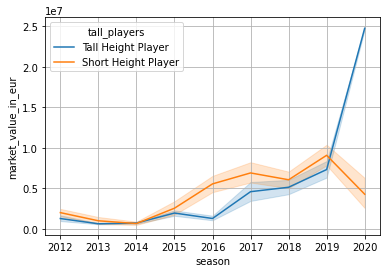

In [10]:
sns.lineplot(data = df2, x = 'season', y = 'market_value_in_eur', hue = 'tall_players')
plt.grid('True')
plt.show()

In [11]:
# Historical trend of tall height players V/S short height players

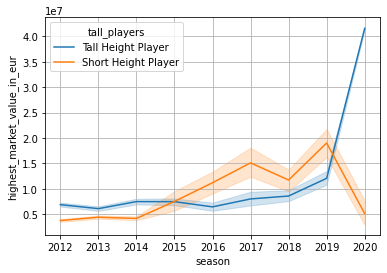

In [12]:
sns.lineplot(data = df2, x = 'season', y = 'highest_market_value_in_eur', hue = 'tall_players')
plt.grid('True')
plt.show()

# Interpretation => 
### As seen from above analysis, we can clearly see that tall heighted players, when seen historically and currently, are showing a sharp increase in the market value after 2019.

### If we see on average terms, we can see that tall height players are currently highly valued as compared to short heighted players. But, if we see historically, we can say that short heighted players has had a high share of market share as compared to tall players, as seen from the visualizations also.

# K-Means Clustering

### If we apply K-Means Clustering to player attributes other than just height (e.g., market value, goals, assists), reveal distinct player archetypes that could inform scouting strategies for identifying undervalued talent within specific clusters?

In [16]:
# Features for clustering
features_for_clustering = ['market_value_in_eur', 'height_in_cm', 'goals', 'assists', 'minutes_played', 'yellow_cards', 'red_cards']

data_for_clustering = df[features_for_clustering].dropna()

In [17]:
data_for_clustering.head()

,market_value_in_eur,height_in_cm,goals,assists,minutes_played,yellow_cards,red_cards
0,2000000.0,194.0,0.0,0.0,120.0,0.0,0.0
1,2000000.0,194.0,1.0,0.0,90.0,0.0,0.0
2,2000000.0,194.0,0.0,0.0,8.0,0.0,0.0
3,700000.0,186.0,0.0,0.0,33.0,1.0,0.0
4,2000000.0,194.0,0.0,0.0,23.0,0.0,0.0


In [18]:
# Scaling

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_for_clustering)

data_scaled = pd.DataFrame(data_scaled, columns = data_for_clustering.columns)

data_scaled.head()

,market_value_in_eur,height_in_cm,goals,assists,minutes_played,yellow_cards,red_cards
0,-0.548763,1.714002,-0.295742,-0.247411,1.637427,-0.342989,-0.050669
1,-0.548763,1.714002,2.157084,-0.247411,0.560965,-0.342989,-0.050669
2,-0.548763,1.714002,-0.295742,-0.247411,-2.381363,-0.342989,-0.050669
3,-0.674189,0.298346,-0.295742,-0.247411,-1.484312,2.759805,-0.050669
4,-0.548763,1.714002,-0.295742,-0.247411,-1.843132,-0.342989,-0.050669


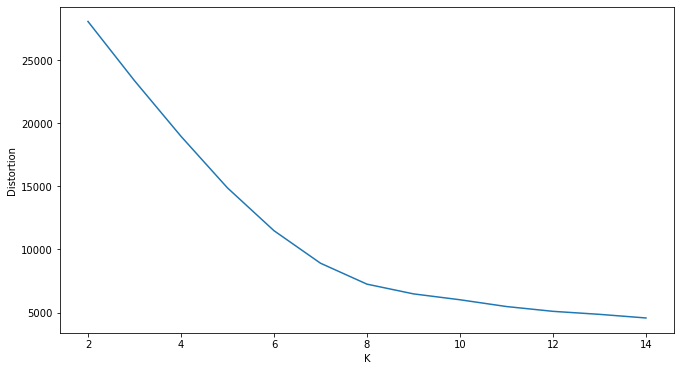

In [19]:
# Optimal value of K

distortion = []

for k in range(2,15):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 34) # n_init is used to provide stability
    kmeans.fit(data_scaled)
    distortion.append(kmeans.inertia_)

fig = plt.figure(figsize = (11,6))
plt.plot(range(2,15),distortion)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [20]:
# K(n_clusters) value can be taken as 8

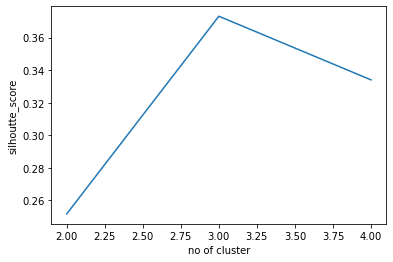

In [21]:
from sklearn.metrics import silhouette_score

n_clusters_range = range(2,5)

silhouette_score_list = []

for n_clusters in n_clusters_range:
    # training the model and getting silhouette score
    silhouette_score_list.append(silhouette_score(data_scaled,KMeans(n_clusters = n_clusters, random_state = 100).fit_predict(data_scaled)))

plt.plot(n_clusters_range,silhouette_score_list)
plt.xlabel('no of cluster')
plt.ylabel('silhoutte_score')
plt.show()

In [22]:
# Selecting 'n_clusters' as 3

# Model
kmeans_3 = KMeans(n_clusters = 3)

kmeans_3.fit(data_scaled)

KMeans(n_clusters=3)

In [23]:
# centroids
centroids = kmeans_3.cluster_centers_
centroids

array([[ 1.54049544, -0.17421568, -0.17690706, -0.10467983,  0.25283054,
        -0.25608278, -0.05066946],
       [-0.60539932,  0.06836061,  0.07075548,  0.03973388, -0.09713276,
         0.10026711, -0.05066946],
       [-0.4242119 ,  0.07714965, -0.29574193,  0.42119753, -0.69191643,
         0.17414317, 19.73575436]])

In [24]:
# labels
labels5 = kmeans_3.labels_
labels5

array([1, 1, 1, ..., 0, 0, 0])

In [80]:
labels5_df = pd.DataFrame(labels5)
labels5_df.value_counts()

1    3354
0    1320
2      12
dtype: int64

In [25]:
n_clusters = 3  # Replace with your chosen optimal K
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels back to your original DataFrame
df_clustered = df.loc[data_scaled.index].copy() # Ensure alignment based on index
df_clustered['cluster'] = clusters

In [86]:
# Try to understand the code below

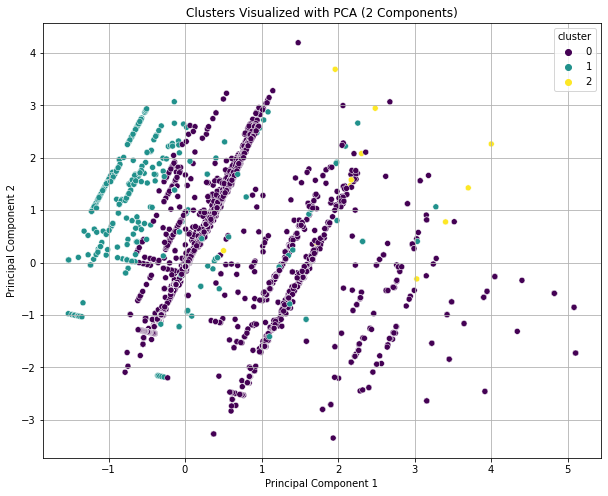

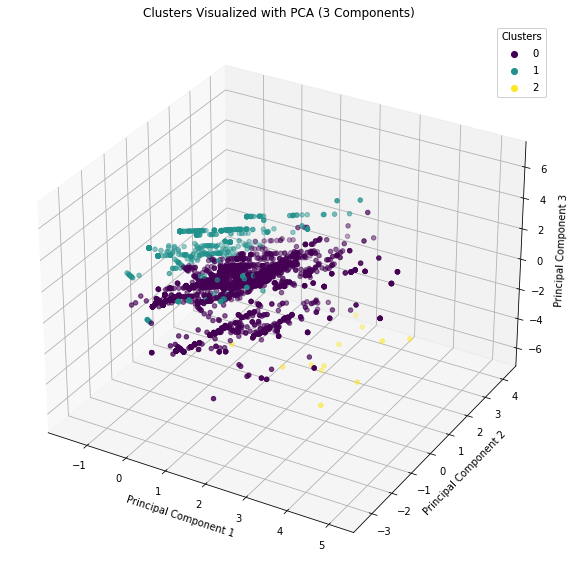

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

if 'cluster' in df_clustered.columns:
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_scaled)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=data_scaled.index)
    pca_df['cluster'] = df_clustered['cluster']

    plt.figure(figsize = (10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
    plt.title('Clusters Visualized with PCA (2 Components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

    # For 3 components:
    if data_scaled.shape[1] >= 3:
        pca_3d = PCA(n_components=3)
        principal_components_3d = pca_3d.fit_transform(data_scaled)
        pca_df_3d = pd.DataFrame(data=principal_components_3d, columns=['PC1', 'PC2', 'PC3'], index=data_scaled.index)
        pca_df_3d['cluster'] = df_clustered['cluster']

        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['cluster'], cmap='viridis')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        ax.set_title('Clusters Visualized with PCA (3 Components)')
        legend = ax.legend(*scatter.legend_elements(), title="Clusters")
        ax.add_artist(legend)
        plt.show()
    else:
        print("Not enough features to visualize in 3D PCA.")

else:
    print("Make sure the 'cluster' column exists in your df_clustered DataFrame.")

In [28]:
# Metrics
from sklearn.metrics import calinski_harabasz_score

chi_index = calinski_harabasz_score(data_scaled,labels5)
chi_index

944.9348342734746

In [64]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(data_scaled,labels5)
db_score

1.0394141753313713

In [82]:
silhouette_avg = round(silhouette_score(data_scaled,labels5),3)
silhouette_avg

0.263

# Interpretation => 

### A Davies-Bouldin score of 1.03 suggests that clusters might be experiencing a little leak of points

### Calinski-Harabasz score of 944.934 suggests that the clusters are decently defined and clusters are having moderate defined separation between other clusters

### A silhouette average score of 0.263 suggests that the model is able to classify points on a moderate basis and that the quality of clusters can also be put under moderate category. There are chances of some overlaps happening